Breast Cancer Wisconsin Dataset 

Imports 

In [1]:
import pandas as pd
import numpy as np  
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns 

Load Dataset 

In [2]:
data = load_breast_cancer()

# convert to DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target 

# 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Train-Test Split 

In [3]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(114, 30)


Feature Scaling 

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
# Ensure X_test is 2D
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()

X_test = scaler.transform(X_test)

Linear Kernel Training 

In [6]:
model_linear = SVC(kernel='linear', probability=True)

# trainn on linear
model_linear.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Train SVM 

In [7]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# predict 
y_pred = model.predict(X_test)

# Evaluation performance
print(" Accuracy Score: ", accuracy_score(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

 Accuracy Score:  0.956140350877193

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


 Confusion Matrix: 
 [[41  2]
 [ 3 68]]


RBF SVM 

In [8]:
svm_rbf = SVC(kernel='rbf', random_state=42)

# fit on traing data
svm_rbf.fit(X_train, y_train)

# predict on training data
y_pred_rbf = svm_rbf.predict(X_test)

RBF Evaluation 

In [9]:
acc_rbf = accuracy_score(y_test, y_pred_rbf) 
print('Accuracy (RBF Kernel)', acc_rbf)

print('\n Classification Report (RBF Kernel): ')
print(classification_report(y_test, y_pred_rbf))

print('\n Confusion Matrix (RBF Matrix): ')
print(confusion_matrix(y_test, y_pred_rbf))

Accuracy (RBF Kernel) 0.9824561403508771

 Classification Report (RBF Kernel): 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


 Confusion Matrix (RBF Matrix): 
[[41  2]
 [ 0 71]]


Visualization 

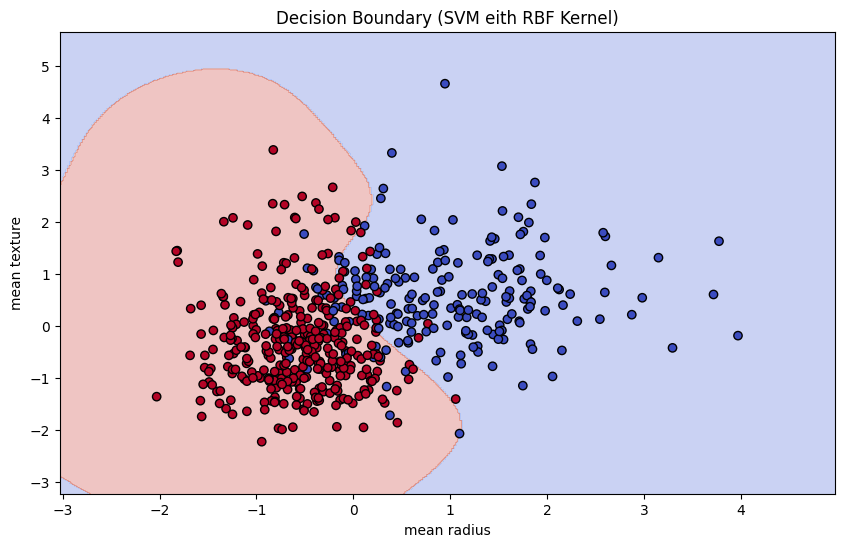

In [10]:
features = ['mean radius', 'mean texture']
X_vis = df[features]
y_vis = df['target']

# Scale the features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Train SVM on 2D on data
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_vis_scaled, y_vis)

# Create meshgrid for plottingg
x_min, x_max = X_vis_scaled[:,0].min() -1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:,1].min() -1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on mesh
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot counter + data 
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Decision Boundary (SVM eith RBF Kernel)')
plt.show()